## **MsAcT Project @Dreamworks**

## **Import modules**

In [1]:
import os
import sys

data_path=os.path.abspath('/media/dataHog/hca/msAcT-acylOctamer') #Where your group data is
base_path=os.path.abspath('/media/dataHog/hca/SimFound_v2/source/') #Where your source code is (SFv2)

sys.path.append(base_path)
sys.path.append(data_path)

import importlib
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings('ignore')
import Protocols as P

import main
import tools
import tools_plots
import Trajectory
import MSM
import Featurize as F
import Discretize
from tqdm import tqdm

from simtk.unit import *

In [2]:
workdir=data_path
results=workdir+'/results'
inputs=workdir+'inputs/structures/'

protein_states={'free' : (['msAcT_octamer'],'msAcT_octamer_init.pdb'),
         'acyl' : (['acyl_octamer'], 'acyl_octamer-init.pdb')}
timestep=5*picoseconds

mols = [['ViAc'], ['BeOH'], ['BuOH']]
mol_parameters= {'BeOH' : ['10mM', '20mM', '40mM', '100mM', '300mM'], 
                 'BuOH' : ['11mM', '22mM', '100mM', '500mM'], 
                 'ViAc' : ['10mM', '50mM', '200mM']}
inib_mols = [['BeOH'], ['BuOH']]
inib_mol_parameters= {'BeOH' : ['100mM', '100mM_BeAc_5mM'],
                     'BuOH' : ['100mM','100mM_ViAc_5mM']}

## **Define Project**

In [3]:
importlib.reload(Trajectory)
importlib.reload(main)

projects = {}
inib_projects = {}
for mol in mols:
    mol_name = mol[0]
    if mol_name == 'ViAc':
        (protein, topology) = protein_states['free']
    else:
        (protein, topology) = protein_states['acyl']
    project = main.Project(title='MsAcT-octamer', 
                     hierarchy=('protein', 'ligand', 'parameter'), 
                     workdir=workdir,
                     parameter=mol_parameters[mol_name], 
                     replicas=10, 
                     protein=protein, 
                     ligand=mol, 
                     topology=topology,
                     timestep=timestep,
                    initial_replica=1)
    project.setSystems(replica_name='sim')
    projects[mol_name] = project

for mol in inib_mols:
    mol_name = mol[0]
    (protein, topology) = protein_states['acyl']
    project =main.Project(title='MsAcT-octamer', 
                     hierarchy=('protein', 'ligand', 'parameter'), 
                     workdir=workdir,
                     parameter=inib_mol_parameters[mol_name], 
                     replicas=10, 
                     protein=protein, 
                     ligand=mol, 
                     topology=topology,
                     timestep=timestep,
                    initial_replica=1)
    project.setSystems(replica_name='sim')
    inib_projects[mol_name] = project

(protein_w, topology_w) = protein_states['acyl']
project_water =main.Project(title='MsAcT-octamer', 
                 hierarchy=('protein', 'ligand', 'parameter'), 
                 workdir=workdir,
                 parameter=['55.56M'], 
                 replicas=10, 
                 protein=protein_w, 
                 ligand=['H2O'], 
                 topology=topology_w,
                 timestep=timestep,
                initial_replica=1)
project_water.setSystems(replica_name='sim')
    
    
supra_project = {'normal' : projects, 'inhibition' : inib_projects, 'water' : {'H2O' : project_water}}

Working on /media/dataHog/hca/msAcT-acylOctamer
Inputs:
/media/dataHog/hca/msAcT-acylOctamer/inputs/structures
/media/dataHog/hca/msAcT-acylOctamer/inputs/forcefields
Working on /media/dataHog/hca/msAcT-acylOctamer
Inputs:
/media/dataHog/hca/msAcT-acylOctamer/inputs/structures
/media/dataHog/hca/msAcT-acylOctamer/inputs/forcefields
Working on /media/dataHog/hca/msAcT-acylOctamer
Inputs:
/media/dataHog/hca/msAcT-acylOctamer/inputs/structures
/media/dataHog/hca/msAcT-acylOctamer/inputs/forcefields
Working on /media/dataHog/hca/msAcT-acylOctamer
Inputs:
/media/dataHog/hca/msAcT-acylOctamer/inputs/structures
/media/dataHog/hca/msAcT-acylOctamer/inputs/forcefields
Working on /media/dataHog/hca/msAcT-acylOctamer
Inputs:
/media/dataHog/hca/msAcT-acylOctamer/inputs/structures
/media/dataHog/hca/msAcT-acylOctamer/inputs/forcefields
Working on /media/dataHog/hca/msAcT-acylOctamer
Inputs:
/media/dataHog/hca/msAcT-acylOctamer/inputs/structures
/media/dataHog/hca/msAcT-acylOctamer/inputs/forcefield

## **Discretization**

The *features* are discretized using the ***Discretize*** module. \
Two modules are available, **Shell Profile** and **Combinatorial**. \
The *discretize* object handles the feature **data** (DataFrame) and also the **feature name** (optional).

In [4]:
importlib.reload(Discretize)
importlib.reload(tools)
import collections

discretized = collections.defaultdict(dict)

for project_type, projects in supra_project.items():
    for mol, project in projects.items():
        if mol == 'ViAc':
            feature_name = f'Ser11-Ala55_{mol}'
        elif mol == 'H2O':
            feature_name=f'acylSer-His_{mol}_water'
        else:
            feature_name = f'acylSer-His_{mol}' 
        discretized[project_type][mol] = Discretize.Discretize(project, method='dNAC', feature_name=feature_name) 
        
        
        
        

Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results


In [40]:
importlib.reload(Discretize)

water_mols = {'normal' : ['BeOH', 'BuOH'], 'inhibition' : ['BeOH', 'BuOH']}
feature_names = {'ViAc': f'Ser11-Ala55_ViAc', 
                'BuOH' : f'acylSer-His_BuOH',
               'BeOH' : f'acylSer-His_BeOH'}
def combinatorial_loader(project_type, projects, collections) :
    
    combinatorial = {}
    if project_type == 'water':
        project = projects['H2O']
        feature_name = 'acylSer-His'
        print(feature_name, end='\n')
        supra_df = Discretize.Discretize(project, 
                                         method='dNAC_combinatorial_onTheFly', 
                                         feature_name=f'{feature_name}_H2O').combinatorial([4,10,20,80], 
                                        labels=['A', 'T', 'E', 'S', 'B'], 
                                        reconstruct=True) 
        
        print(np.unique(supra_df.dropna().values.flat).astype(int))
        for p_type, mols_w in water_mols.items():
            print(p_type, mols_w)
            
            
            if p_type == 'normal' :
                for mol_w in mols_w:

                    its_w = supra_project[p_type][mol_w].parameter
                    for it_w in its_w:
                        df_name = f'{project.results}/combinatorial_{feature_name}_{mol_w}_water_{it_w}_{state_name}.csv'
                        print(df_name, end='\n')
                        df_mol = pd.read_csv(df_name, 
                                             index_col=0, 
                                             header=[0,1,2,3,4,5])
                        supra_df = pd.concat([supra_df, df_mol], axis=1)
                        print(mol_w, it_w, np.unique(supra_df.dropna().values.flat).astype(int))
            else:
                for mol_w in mols_w:
                    if mol_w == 'BeOH':
                        mol2 = 'BeAc'
                    elif mol_w == 'BuOH':
                        mol2 = 'ViAc'
                    else:
                        mol2 = None
                    df_name = f'{project.results}/combinatorial_{feature_name}_{mol_w}-{mol2}_water_100mM_{mol2}_5mM_{state_name}.csv'
                    print(df_name, end='\n')
                    supra_df = pd.concat([supra_df, pd.read_csv(df_name, index_col=0, header=[0,1,2,3,4,5])], axis=1)

        combinatorial['H2O'] = supra_df
        
    elif project_type == 'normal':
        
        supra_df = pd.DataFrame()
        for mol, project in projects.items():  
            
            #feature_name = feature_names[mol]
            #print(feature_name, end='\n')
            #if mol == 'ViAc':
            feature_name = feature_names[mol] #f'Ser11-Ala55_{mol}'
            #else:
            #    feature_name = f'acylSer-His_{mol}' 

            df_mol = Discretize.Discretize(project, method='dNAC', feature_name=feature_name).combinatorial([4,10,20,80], labels=['A', 'T', 'E', 'S', 'B'])
            supra_df = pd.concat([supra_df, df_mol], axis=1)
            combinatorial[mol] = df_mol
    else:
        
        supra_df = pd.DataFrame()
        for mol, project in projects.items(): 
            
            feature_name = feature_names[mol]
            print(feature_name, end='\n')
            df_base = pd.read_csv(f'{project.results}/combinatorial_{feature_name}_100mM_{state_name}.csv', index_col=0, header=[0,1,2,3,4,5])
            if mol == 'BeOH':
                mol2 = 'BeAc'
            elif mol == 'BuOH':
                mol2 = 'ViAc'
            df_mol_in_mol2 = pd.read_csv(f'{project.results}/combinatorial_{feature_name}_100mM_{mol2}_5mM_{state_name}.csv', index_col=0, header=[0,1,2,3,4,5])
            df_mol2 = pd.read_csv(f'{project.results}/combinatorial_{feature_name.split(mol)[0]}{mol2}_100mM_{mol2}_5mM_{state_name}.csv', index_col=0, header=[0,1,2,3,4,5])
            df_mol = pd.concat([df_base, df_mol_in_mol2, df_mol2], axis=1) 
            supra_df = pd.concat([supra_df, df_mol], axis=1) 
    
            combinatorial[mol] = df_mol
            
            
    return combinatorial, supra_df   

In [41]:
importlib.reload(Discretize)
importlib.reload(tools)
import collections
sampled_states = {}


state_boundaries = [4,10,20,80]
input_labels = ['A', 'T', 'E', 'S', 'B']
state_name = 'ATESB'
combinatorial = collections.defaultdict(dict)
supra_dfs = {}
for project_type, projects in supra_project.items():
    print(project_type)
    comb, supra_df = combinatorial_loader(project_type, projects, collections)

    state_indexes = np.unique(supra_df.dropna().values.flat).astype(int) 
    state_labels = tools.Functions.sampledStateLabels(state_boundaries, input_labels, sampled_states=state_indexes) 

    states = {j : i for i, j in zip(state_labels, state_indexes)}
    _sampled_states = tools.Functions.state_remaper(states)
    
    sampled_states[project_type] = _sampled_states
    supra_dfs[project_type] = supra_df
    combinatorial[project_type] = comb  
    
    


normal
Ser11-Ala55_ViAc
Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
acylSer-His_BeOHdataHog/hca/msAcT-acylOctamer/results/combinatorial_Ser11-Ala55_ViAc_200mM_ATESB.csv
Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
acylSer-His_BuOHdataHog/hca/msAcT-acylOctamer/results/combinatorial_acylSer-His_BeOH_300mM_ATESB.csv
Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
inhibitionmedia/dataHog/hca/msAcT-acylOctamer/results/combinatorial_acylSer-His_BuOH_500mM_ATESB.csv
acylSer-His_BeOH
acylSer-His_BuOH
water
acylSer-His
Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
[15 31]  /media/dataHog/hca/msAcT-acylOctamer/results/combinatorial_acylSer-His_H2O_55.56M_ATESB.csv
normal ['BeOH', 'BuOH']
/media/dataHog/hca/msAcT-acylOctamer/results/combinatorial_acylSer-His_BeOH_water_10mM_ATESB.csv
BeOH 10mM [15 31]
/media/dataHog/hca/msAcT-acylOctamer/results/combinatorial_acylSer-His_BeOH_w

In [42]:
    
#REMOVE 'ATES' STATE
edited_sampled_states = collections.defaultdict(dict)
copy_states = {k : v for k, v in sampled_states['normal'][0].items() if (v != 'ATES')}

original_values, replaced_values, labels = [], [], []
for idx,(index, label) in enumerate(copy_states.items()):

    original_values.append(index)
    replaced_values.append(idx)
    labels.append(label)
edited_sampled_states['normal'] = (copy_states, {r : l for r, l in zip(replaced_values, labels)})
edited_sampled_states['water'] = sampled_states['water']
edited_sampled_states['inhibition'] = (copy_states, {r : l for r, l in zip(replaced_values, labels)})

## Double Combinatorial

{0: 'B', 1: 'SB', 2: 'ESB', 3: 'TSB', 4: 'TESB', 5: 'ASB', 6: 'AESB', 7: 'ATSB', 8: 'ATESB', 9: 'w_B', 10: 'w_SB', 11: 'w_ESB', 12: 'w_TSB', 13: 'w_TESB', 14: 'w_ASB', 15: 'w_AESB', 16: 'w_ATSB', 17: 'w_ATESB'} {0: 'w_B', 1: 'w_SB', 2: 'w_ESB', 3: 'w_TSB', 4: 'w_TESB', 5: 'w_ASB', 6: 'w_AESB', 7: 'w_ATSB', 8: 'w_ATESB'} {0: 'B', 1: 'SB', 2: 'ESB', 3: 'TSB', 4: 'TESB', 5: 'ASB', 6: 'AESB', 7: 'ATSB', 8: 'ATESB'}
0 BeOH (['10mM', '20mM', '40mM', '100mM', '300mM', '100mM_BeAc_5mM'], 'BeAc')
0 10mM
1 20mM
2 40mM
3 100mM
4 300mM
5 100mM_BeAc_5mM
1 BuOH (['11mM', '22mM', '100mM', '500mM', '100mM_ViAc_5mM'], 'ViAc')
0 11mM
1 22mM
2 100mM
3 500mM
4 100mM_ViAc_5mM
BeOH
10mM
20mM
40mM
100mM
300mM
100mM_BeAc_5mM
BuOH
11mM
22mM
100mM
500mM
100mM_ViAc_5mM


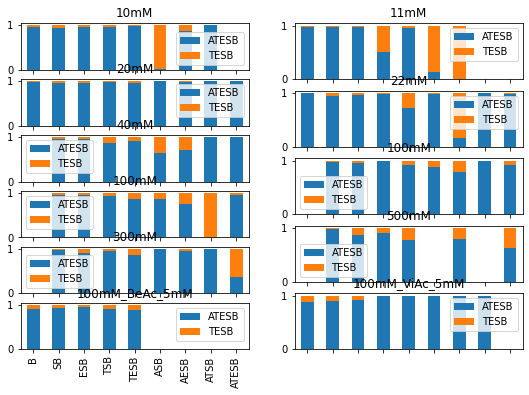

In [54]:
importlib.reload(Discretize)
importlib.reload(tools)
mol_water = {'BeOH' : (supra_project['normal']['BeOH'].parameter + ['100mM_BeAc_5mM'], 'BeAc'),
            'BuOH' : (supra_project['normal']['BuOH'].parameter + ['100mM_ViAc_5mM'], 'ViAc')}
double_comb_trajs_edited = Discretize.Discretize.get_double_combinatorial(combinatorial, 
                                                                   mol_water, 
                                                                   edited_sampled_states, 
                                                                   results=results)

double_comb_states_fractions_edited = double_comb_trajs_edited[2]

# **Markov State Models**

In [55]:
lags = {'normal' : {'ViAc' : [1500, 1500, 1500],
                    'BeOH' : [1000, 1000, 1500, 2000, 1500],
                    'BuOH' : [1500, 1500, 1500, 1500]},
        'inhibition' : {'BeOH' : [2000, 2000],
                        'BuOH' : [1500, 1500],
                       'BeAc' : [1500],
                       'ViAc' : [1500]},
        'water' : {'H2O' : [1000],
                    'BeOH' : [1000]* 6,
                    'BuOH' : [1000]* 5}}


target_regions = {'normal' : ([1,3], [19,23,27,30,31]),
                 'inhibition' : ([1,3,7,11], [15, 19,23,27,31]),
                 'water' : ( [15], [31]),
                  'water_double' : ([0,1,2,3,4,5,6,7,8], [9,10,11,12,13,14,15,16,17])}
                 #'water_double' : ([0,1,9,10], [5,6,7,8])} #[5,6,7,8,14,15,16,17]

mol_water = {'BeOH' : (supra_project['normal']['BeOH'].parameter + ['100mM_BeAc_5mM'], 'BeAc'),
            'BuOH' : (supra_project['normal']['BuOH'].parameter + ['100mM_ViAc_5mM'], 'ViAc')}


In [56]:
 double_comb_trajs_edited[3]

{0: 'B',
 1: 'SB',
 2: 'ESB',
 3: 'TSB',
 4: 'TESB',
 5: 'ASB',
 6: 'AESB',
 7: 'ATSB',
 8: 'ATESB',
 9: 'w_B',
 10: 'w_SB',
 11: 'w_ESB',
 12: 'w_TSB',
 13: 'w_TESB',
 14: 'w_ASB',
 15: 'w_AESB',
 16: 'w_ATSB',
 17: 'w_ATESB'}

normal {'ViAc': <main.Project object at 0x7efefd4cd210>, 'BeOH': <main.Project object at 0x7efefd4e7190>, 'BuOH': <main.Project object at 0x7efefd4fc390>} single
comb water
ViAc normal {1: 'B', 3: 'SB', 7: 'ESB', 11: 'TSB', 15: 'TESB', 19: 'ASB', 23: 'AESB', 27: 'ATSB', 31: 'ATESB'}
Processing :  ['ViAc', 0, '10mM', 1500] 
Processing :  ['ViAc', 1, '50mM', 1500] 
Processing :  ['ViAc', 2, '200mM', 1500] 
BeOH normal {1: 'B', 3: 'SB', 7: 'ESB', 11: 'TSB', 15: 'TESB', 19: 'ASB', 23: 'AESB', 27: 'ATSB', 31: 'ATESB'}
Processing :  ['BeOH', 0, '10mM', 1000] 
Processing :  ['BeOH', 1, '20mM', 1000] 
Processing :  ['BeOH', 2, '40mM', 1500] 
Processing :  ['BeOH', 3, '100mM', 2000] 
Processing :  ['BeOH', 4, '300mM', 1500] 
BuOH normal {1: 'B', 3: 'SB', 7: 'ESB', 11: 'TSB', 15: 'TESB', 19: 'ASB', 23: 'AESB', 27: 'ATSB', 31: 'ATESB'}
Processing :  ['BuOH', 0, '11mM', 1500] 
Processing :  ['BuOH', 1, '22mM', 1500] 
Processing :  ['BuOH', 2, '100mM', 1500] 
Processing :  ['BuOH', 3, '500mM', 1500

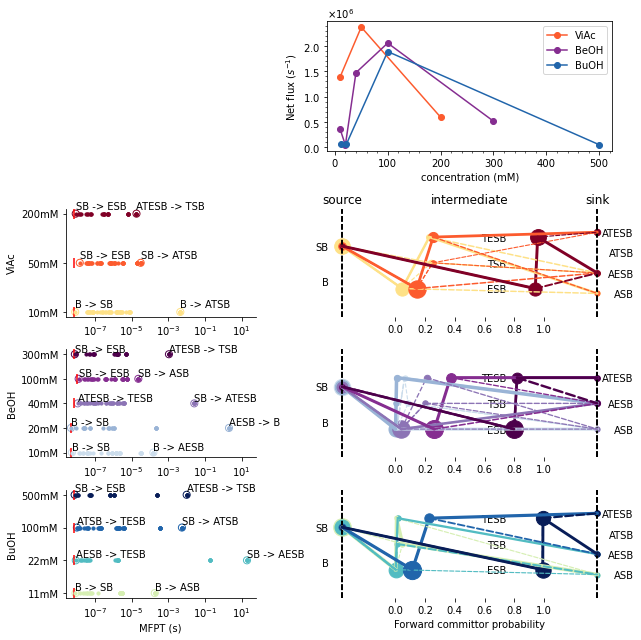

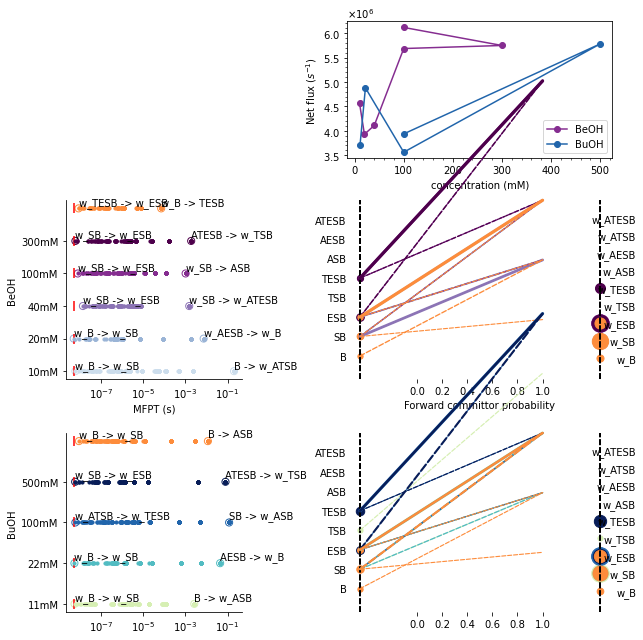

In [57]:
importlib.reload(MSM)
importlib.reload(Trajectory)
importlib.reload(tools_plots)
importlib.reload(tools)


msm = MSM.MSM(supra_project, pre_process = False, warnings=True)
out = msm.lite(mol, 
               lags, 
               input_data=supra_dfs, 
               extra_input_data = double_comb_trajs_edited[0], 
               methods=['bayesMSM', 'flux', 'MFPT'], # 
               plot_figure=True, 
               plot_its = False,
               plot_cktest = False,
               states=edited_sampled_states, 
               water_mode ='single',
               extra_states= double_comb_trajs_edited[3], 
               regions=target_regions,
              paths_to_plot=5,
              macrostates=3)

In [400]:
flux_viac = [1389856.675, 2380190.943, 591248.559]

[0, 0.01, 0.02, 0.04, 0.1, 0.3]
[0, 0.011, 0.022, 0.1, 0.5]


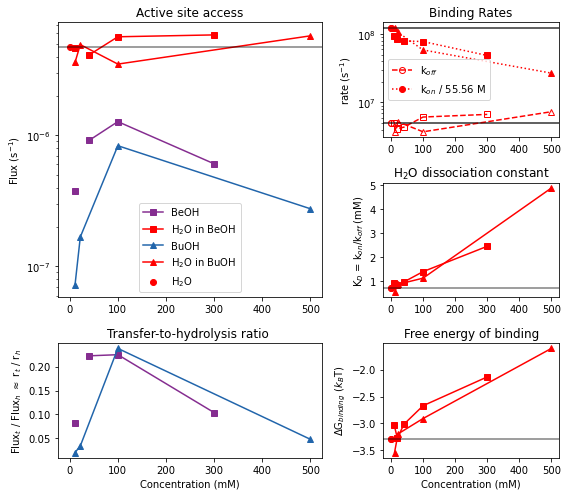

In [134]:
from matplotlib.lines import Line2D

R = 8.34 #J K-1mol-1
T= 291

beoh_x = [0, 0.01, 0.02, 0.04, 0.1, 0.3]
buoh_x = [0, 0.011, 0.022, 0.1, 0.5]


dG_integral_beoh = [-2.528, 12.913, 4.432, -4.501, 35.102]
dG_integral_buoh = [18.071, 41.420, 1.289, 26.945] 
dG_integral_water = 125.148
dG_integral_water_beoh = [123.864, 134.239, 133.678, 136.345, 142.767]
dG_integral_water_beoh_ternary = 127.627
dG_integral_water_buoh = [122.313, 123.823, 138.659, 146.908]
dG_integral_water_beoh = 131.641


water_atesb_beoh = [0.964262, 0.953795, 0.963728, 0.953372, 0.935285, 0.894200]
water_atesb_beoh_ternary = []
water_atesb_buoh = [0.964262, 0.971892, 0.960640, 0.948286, 0.832545]
water_atesb_buoh_ternary = []
water_flux_0 = 4692892.520
water_flux_beoh = np.array([4620063.116, np.nan, 4111318.825, 5664231.860, 5853980.987]) #3963577.232
water_flux_buoh = np.array([3611786.841, 4933937.111, 3504458.141, 5758007.460])

water_reverse_beoh = np.array([4564233.669, 3928017.799, 4109423.815, 5684857.773, 5747559.339])
water_reverse_beoh_ternary = 6117101.880237794
water_reverse_buoh = np.array([3703285.083, 4879477.888, 3560839.625, 5779899.369])
water_reverse_buoh_ternary = 3935985.5018252498

#beoh_water_max = np.array([4901960.784, 4901960.784, 4115226.337, 4329004.329, 6097560.975, 6666666.666])
#buoh_water_max = np.array([4901960.784, 3731343.283, 5181347.150, 3703703.703 , 7299270.072 ])

beoh_water_flux = np.array([379898.327, np.nan, 915349.267, 1274559.161, 607540.598])
buoh_water_flux = np.array([72289.726, 167993.0926, 834666.631, 275659.776])



beoh_flux = np.array([354790.175, 37569.733, 1474880.304, 2062880.419, 511769.094])
buoh_flux = np.array([63536.184, 57268.742, 1894492.144, 43953.722])

viac_flux = [1389856.675, 2380190.943, 591248.559]

beoh_on = 1 / np.array([7.99e-09, 1.07e-08, 1.16e-08, 1.25e-08, 1.28e-08, 2.05e-08])
beoh_off = 1 / np.array([2.04e-07, 2.04e-07, 2.43e-07, 2.31e-07, 1.64e-07, 1.50e-07])
buoh_on = 1 / np.array([7.99e-09, 8.17e-09, 9.41e-09, 1.70e-08, 3.72e-08])
buoh_off =  1 / np.array([2.04e-07, 2.68e-07, 1.93e-07, 2.7e-07, 1.37e-07])

kinetics = {'BeOH' : [beoh_on, beoh_off, beoh_flux, beoh_water_flux, water_flux_beoh, water_reverse_beoh, water_reverse_beoh_ternary],
        'BuOH' : [buoh_on, buoh_off, buoh_flux, buoh_water_flux, water_flux_buoh, water_reverse_buoh, water_reverse_buoh_ternary]}

scalars = {'BeOH': beoh_x, 'BuOH' : buoh_x}
colors = {'BeOH': [pl.cm.BuPu(np.linspace(0.2,1,5)[3]), 's'], 'BuOH' : [pl.cm.YlGnBu(np.linspace(0.2,1,4)[2]),'^']}
thermo = {'BeOH' : water_atesb_beoh, 'BuOH' : water_atesb_buoh}


fig= plt.figure(constrained_layout=True, figsize=(8,7))
outer_grid = gridspec.GridSpec(3,2, width_ratios=[3,2])

axes_flux = plt.subplot(outer_grid[0:2,0]) #grid_mols[0])
axes_water = plt.subplot(outer_grid[0,1], sharex=axes_flux) #
axes_kd = plt.subplot(outer_grid[1,1], sharex=axes_flux) #grid_water[1]
axes_K = plt.subplot(outer_grid[2,1], sharex=axes_flux)
axes_comparison = plt.subplot(outer_grid[2,0], sharex=axes_flux)



#axes_water.set_title('Water kinetics')

axes_flux.set_title('Active site access')
axes_flux.set_ylabel(r'Flux (s$^{-1}$)')
axes_water.set_ylabel(r'rate (s$^{-1}$)')
axes_kd.set_title(r'H$_2$O dissociation constant')
axes_kd.set_ylabel(r'K$_D$ = k$_{on}$/k$_{off}$ (mM)')
axes_K.set_ylabel(r'$\Delta$G$_{binding}$ ($\it{k}$$_B$T)')
axes_K.set_xlabel('Concentration (mM)')
#axes_water.set_xlabel('mM')
#axes_kd.set_xlabel('mM')
#axes_flux.set_xlabel('mM')
axes_comparison.set_xlabel('Concentration (mM)')
axes_flux.set_yscale('log')
axes_water.set_yscale('log')
axes_comparison.set_title('Transfer-to-hydrolysis ratio ')
axes_K.set_title('Free energy of binding')
axes_water.set_title('Binding Rates')
axes_comparison.set_ylabel(r'Flux$_t$ / Flux$_h$ $\approx$ r$_t$ / r$_h$')

convert_unit = 1e12

for mol, data in kinetics.items():
    color = colors[mol][0]
    marker = colors[mol][1]
    legend_kon = (f'{mol} binding')
    legend_koff = (f'{mol} release')
    _x = scalars[mol]
    print(_x)
    x = np.array(_x) * 1000
    sampling = np.array(thermo[mol])
    
    for idx, d in enumerate(data):
        data[idx] = d / convert_unit
    (_on, _off, flux, mol_water_flux, water_flux, water_rev_flux, ternary) = data
    
    on = _on * convert_unit
    off = _off * convert_unit
    _K = np.array(sampling / (1 - np.array(sampling)))
    K = np.negative(np.log(_K))
    K_d = 1 / (on*55.56 /off)
    

    axes_water.plot(x[1:], on[1:], marker=marker, linestyle='dotted', label=legend_kon, color='red')
    axes_water.plot(x[1:], off[1:], marker=marker, linestyle='dashed', fillstyle='none', label=legend_koff, color='red')
    axes_water.plot(0, on[0], 'o-',  color='red')
    axes_water.plot(0, off[0], 'o-', fillstyle='none',color='red')
    axes_water.axhline(off[0], color='black', alpha=0.5)
    axes_water.axhline(on[0], color='black', alpha=0.5)
    
    axes_flux.plot(x[1:], mol_water_flux, marker=marker, linestyle='solid', color=color, label=f'{mol}')
    axes_flux.plot(x[1:], water_flux, marker=marker, linestyle='solid',  color='red', label=fr'H$_2$O in {mol}')

    axes_K.plot(x[1:], K[1:], marker=marker, color='red')
    axes_K.scatter(x[0], K[0], color='red')
    
    axes_kd.plot(x[1:], K_d[1:] * 1000, marker=marker, color='red')
    axes_kd.scatter(0, K_d[0] * 1000, color='red')
    
    axes_comparison.plot(x[1:], mol_water_flux / water_flux, marker = marker, color=color)
    
water_elements = [Line2D([0], [0], marker='o', color='red', linestyle='dashed', label=r'k$_{off}$', markerfacecolor='none'),
                Line2D([0], [0], marker='o', color='red', linestyle='dotted', label=r'k$_{on}$ / 55.56 M', markerfacecolor='red')]
axes_water.legend(handles=water_elements)

flux_water_only = water_flux_0 / convert_unit
axes_flux.scatter(0, flux_water_only, color='red', label=r'H$_2$O')
axes_flux.legend() #loc='upper right')

axes_kd.axhline(K_d[0] * 1000, color='black', alpha=0.5)
axes_K.axhline(K[0], color='black', alpha=0.5)
axes_flux.axhline(flux_water_only, color='black', alpha=0.5)
fig.tight_layout()
fig.show()
fig.savefig('/media/dataHog/hca/msAcT-acylOctamer/results/figures/scheme1.png', dpi=600)

In [456]:
    if mol == 'BeOH': 
        axes_kd.annotate(f'{np.round(K_d[0]*1000, decimals=2)}', 
                         (0,K_d[0]*1000),
                         xytext=(0,3),
                         xycoords='data', 
                         arrowprops=dict(arrowstyle="simple",
                                        edgecolor='black',
                                        facecolor='black'))
        axes_K.annotate(fr'{np.round(K[0], decimals=2)}', 
                         (0,K[0]),
                         xytext=(200,K[0]),
                         xycoords='data', 
                         arrowprops=dict(arrowstyle="simple",
                                        edgecolor='black',
                                        facecolor='black'))
        axes_water.annotate(f'{on[0]:.2E}', 
                 (0,on[0]),
                 xytext=(200,on[0]*0.8),
                 xycoords='data', 
                 arrowprops=dict(arrowstyle="simple",
                                edgecolor='black',
                                facecolor='black'))

[1389856.675, 2380190.943, 591248.559]

## Correlations

In [11]:
mol_ternary = {'BeOH' : 'BeAc', 'BuOH' : 'ViAc'}
mol_water = {'BeOH' : (supra_project['normal']['BeOH'].parameter + ['100mM_BeAc_5mM'], 'BeAc'),
            'BuOH' : (supra_project['normal']['BuOH'].parameter + ['100mM_ViAc_5mM'], 'ViAc')}
importlib.reload(Discretize)
importlib.reload(tools)
methods = ('cross-correlation', 'convolution', 'corr_coeff')
    

metric_tables_inhib, trajectories_inhib = Discretize.Discretize.get_metricsInhibition(combinatorial, mol_ternary, edited_sampled_states, method='mutualInformation')
correlation_tables_inhib, _ = Discretize.Discretize.get_metricsInhibition(combinatorial, mol_ternary, edited_sampled_states, method='correlation')
metric_tables_water, trajectories_water = Discretize.Discretize.get_metricsWater(combinatorial, mol_water, edited_sampled_states, method='mutualInformation')
correlation_tables_water, _ = Discretize.Discretize.get_metricsWater(combinatorial, mol_water, edited_sampled_states, method='correlation')
metric_tables_normal, trajectories_normal = Discretize.Discretize.get_metricsNormal(combinatorial, {}, sampled_states, method='mutualInformation')
#correlation_tables_normal, _ = Discretize.Discretize.get_metricsNormal(combinatorial, {}, sampled_states, method='correlation')

BeOH
BuOH
BeOH
BuOH
0 BeOH (['10mM', '20mM', '40mM', '100mM', '300mM', '100mM_BeAc_5mM'], 'BeAc')
1 BuOH (['11mM', '22mM', '100mM', '500mM', '100mM_ViAc_5mM'], 'ViAc')
0 BeOH (['10mM', '20mM', '40mM', '100mM', '300mM', '100mM_BeAc_5mM'], 'BeAc')
1 BuOH (['11mM', '22mM', '100mM', '500mM', '100mM_ViAc_5mM'], 'ViAc')
0 ViAc
A B
C H
E F
D G
A B
C H
E F
D G
A B
C H
E F
D G
1 BeOH
A B
C H
E F
D G
A B
C H
E F
D G
A B
C H
E F
D G
A B
C H
E F
D G
A B
C H
E F
D G
2 BuOH
A B
C H
E F
D G
A B
C H
E F
D G
A B
C H
E F
D G
A B
C H
E F
D G


In [12]:
metric_tables_all = {'normal' : metric_tables_normal, 'water' : metric_tables_water, 'inhibition' : metric_tables_inhib}
metric_trajectories_all = {'normal': trajectories_normal, 'water' : trajectories_water, 'inhibition' : trajectories_inhib}
correlation_tables_all = {'normal' : [] , 'water' : correlation_tables_water, 'inhibition' : correlation_tables_inhib}

In [476]:

metric_tables_water_all, _ = Discretize.Discretize.get_metricsWater(combinatorial, mol_water, edited_sampled_states, corr_mode='all', method='mutualInformation')

0 BeOH (['10mM', '20mM', '40mM', '100mM', '300mM', '100mM_BeAc_5mM'], 'BeAc')
1 BuOH (['11mM', '22mM', '100mM', '500mM', '100mM_ViAc_5mM'], 'ViAc')


()


TypeError: Image data of dtype object cannot be converted to float

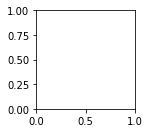

In [477]:
cmap = plt.get_cmap('YlGnBu')
cmap.set_bad('pink')

labels = [f'ref_{i}' for i in range(1,9)]
fig=plt.figure()
grid = gridspec.GridSpec(1, len(metric_tables_normal))
states = list(sampled_states['normal'][0].values())
for idx_mol, (mol, v) in enumerate(metric_tables_normal.items()):
    iterable_scalars = []
    means = []
    ax = plt.subplot(grid[idx_mol])
    _vmax=0
    for it, v2 in v.items():
        #print(mol, it, v2)
        print(np.shape(v2))
        ax.imshow(v2)
        #table = np.asarray(v2)).reshape(2,2)
        #mean = np.asarray(list(v2.values())).mean()
        #means.append(mean)
        #bulk_value=float(str(it).split('mM')[0])
        #iterable_scalars.append(bulk_value)
        #mask = np.ones(table.shape, dtype=bool)
        #np.fill_diagonal(mask, 0)
        #_vmax = table.max()

        #ax = plt.subplot(gs)
        
        #ax.set_xticks(range(8))
        #ax.set_yticks(range(8))
        #ax.set_xticklabels(labels, rotation=90)
        #ax.set_yticklabels(labels)
        #hm = ax.imshow(table /_vmax, cmap=cmap, vmin=0, vmax=1)
        #ax.invert_yaxis()
    
    #ax.scatter(iterable_scalars, means)
plt.show()
        
        
        #plt.imshow(table)
        #plt.show()

In [ ]:
## subunit_states = edited_sampled_states['normal'][1]
labels = list(sampled_states['normal'][1].values())
ticks = list(sampled_states['normal'][1].keys())
cmap = plt.get_cmap('Greys')
for mol, v in metric_tables_all['normal'].items():
    fig=plt.figure(figsize=(10,11)) #
    grid = gridspec.GridSpec(3, len(v), height_ratios=[1,1,1], hspace=0, wspace=0.1)
    
    _vmax=0
    _data_it = []
    iterable_scalars = []
    df = pd.DataFrame()
    ax_all = plt.subplot(grid[0,:])
    for idx, (it,subunits) in enumerate(v.items()):
        _data = []
        _data_states = []
        _labels = []
        ax = plt.subplot(grid[1, idx])
        ax.set_xticklabels(labels, rotation=90)
        ax.set_yticklabels(labels)
        ax.set_yticks(ticks)
        ax.set_xticks(ticks)
        
        ax.set_title(it)
        
        if idx != 0:
            ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
        
        bulk_value=float(str(it).split('mM')[0])
        iterable_scalars.append(bulk_value)
        
        sub_grid = gridspec.GridSpecFromSubplotSpec(2,2, subplot_spec = grid[2,idx], hspace=0, wspace=0) 
        _vmax_pair = 0
        
        for idx_pair, (pair_label, matrix) in enumerate(subunits.items()): 
            
            ax_pair = plt.subplot(sub_grid[idx_pair], sharex=ax, sharey=ax)
            plot = ax_pair.imshow(matrix, cmap=cmap, aspect='auto') #, vmin=0, vmax=max(_vmax_pair, v3.max()))
            ax_pair.set_title(pair_label)
            ax_pair.invert_yaxis()
            if idx_pair != 2 or idx != 0:
                ax_pair.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
            data_pair = matrix.sum(axis=0)
            data_pair_1 = matrix.sum(axis=1)

            sums = data_pair + data_pair_1
            
            _data.append(matrix) #[data_pair, data_pair_1]
            _labels.append(pair_label)

        data = np.asarray(_data).mean(axis=0)
        _data_it.append(data)
        
        
        plot = ax.imshow(data, cmap=cmap) 
        ax.invert_yaxis()

        mean_sums = np.vstack([data.sum(axis=0),data.sum(axis=1)]).mean(axis=0)
        df_it = pd.DataFrame(mean_sums / mean_sums.max(), columns=[it])
        df = pd.concat([df, df_it], axis=1)

    df.plot.bar(ax=ax_all)
print(df)
fig.tight_layout()            
plt.show()

## Delta G

normal
Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
Loading DG of  10mMaHog/hca/msAcT-acylOctamer/results/shellProfile_Ser11-Ala55_ViAc_200mM_d0.25_b0_e-1_s1.csv
Loading DG of  50mM
Loading DG of  200mM


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
Loading DG of  10mMaHog/hca/msAcT-acylOctamer/results/shellProfile_acylSer-His_BeOH_300mM_d0.25_b0_e-1_s1.csv
Loading DG of  20mM
Loading DG of  40mM
Loading DG of  100mM
Loading DG of  300mM


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
Loading DG of  11mMaHog/hca/msAcT-acylOctamer/results/shellProfile_acylSer-His_BuOH_500mM_d0.25_b0_e-1_s1.csv
Loading DG of  22mM
Loading DG of  100mM
Loading DG of  500mM


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


inhibition
Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
Loading DG of  100mMHog/hca/msAcT-acylOctamer/results/shellProfile_acylSer-His_BeOH_100mM_BeAc_5mM_d0.25_b0_e-1_s1.csv
Loading DG of  100mM_BeAc_5mM


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
Loading DG of  100mMHog/hca/msAcT-acylOctamer/results/shellProfile_acylSer-His_BuOH_100mM_ViAc_5mM_d0.25_b0_e-1_s1.csv
Loading DG of  100mM_ViAc_5mM


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


water
<main.Project object at 0x7f10a8861790> H2O
Results will be stored under:  /media/dataHog/hca/msAcT-acylOctamer/results
Loading DG of  55.56Mog/hca/msAcT-acylOctamer/results/shellProfile_acylSer-His_H2O_55.56M_d0.25_b0_e-1_s1.csv


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


normal ['BeOH', 'BuOH']
normal BeOH
normal BuOH
inhibition ['BeOH', 'BuOH']
BeOH BeAc
BuOH ViAc


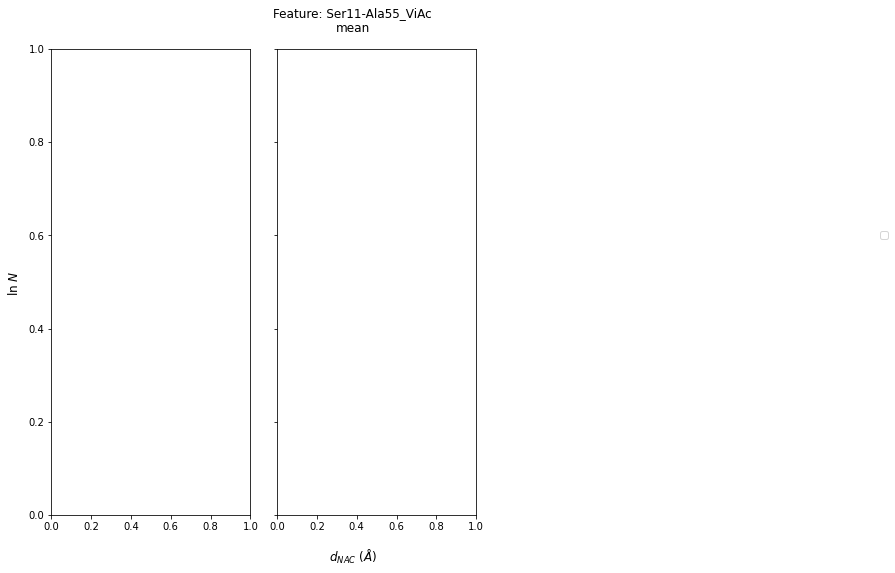

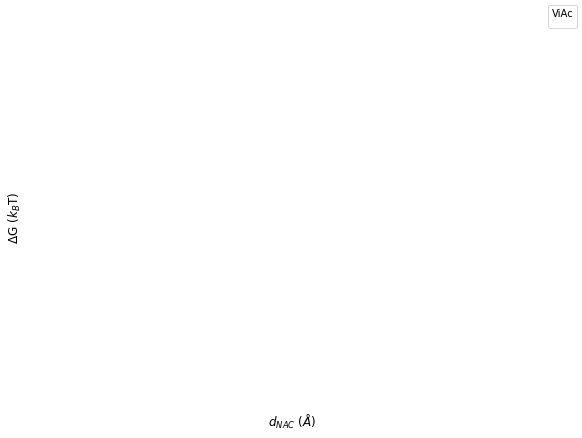

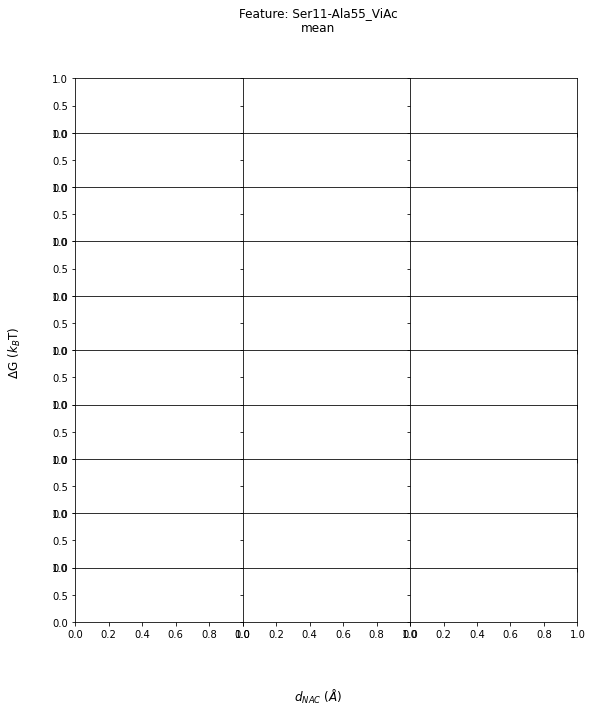

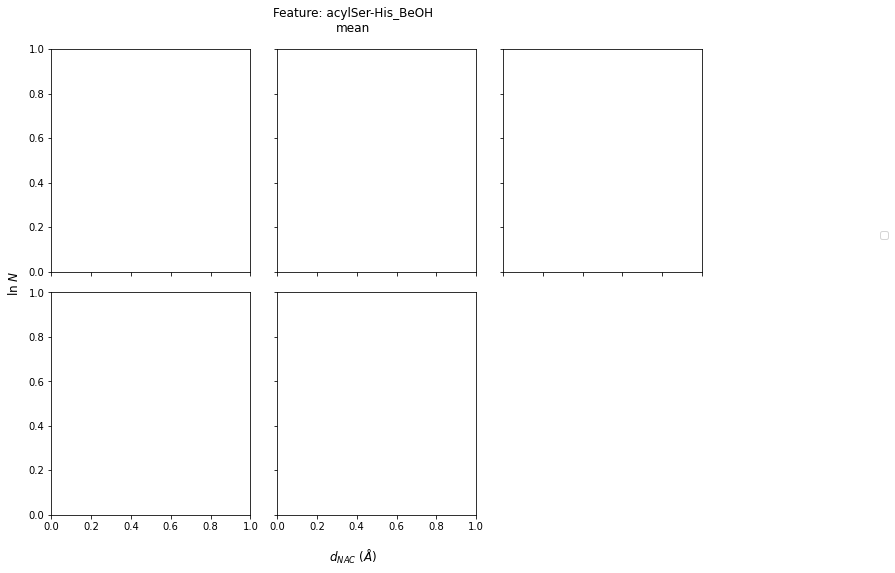

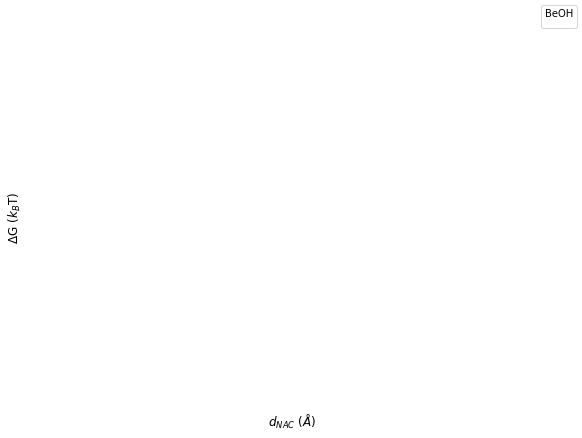

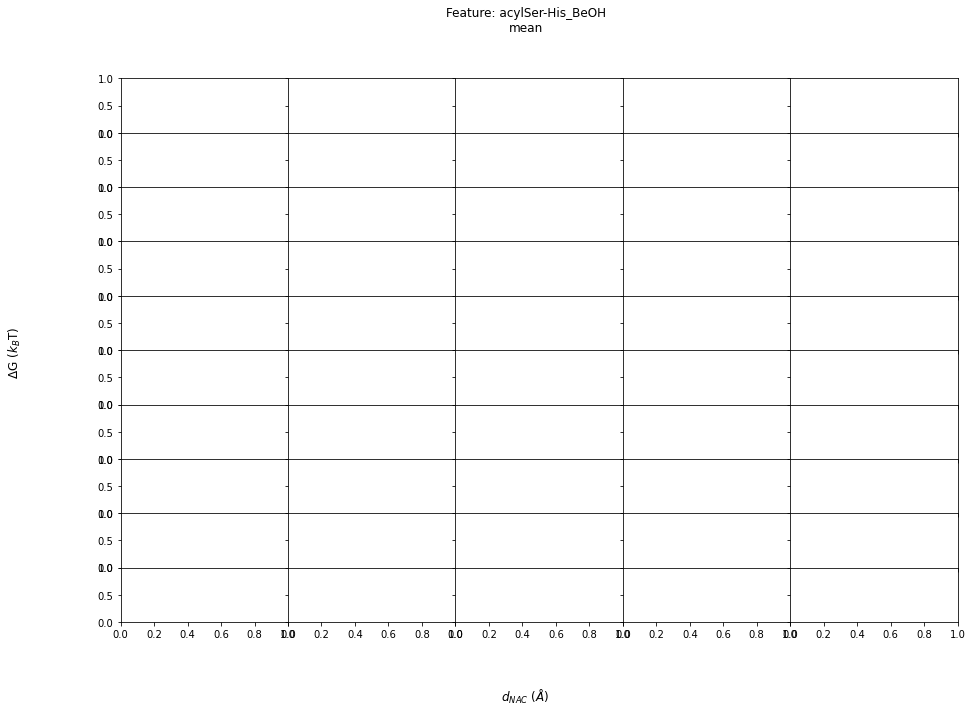

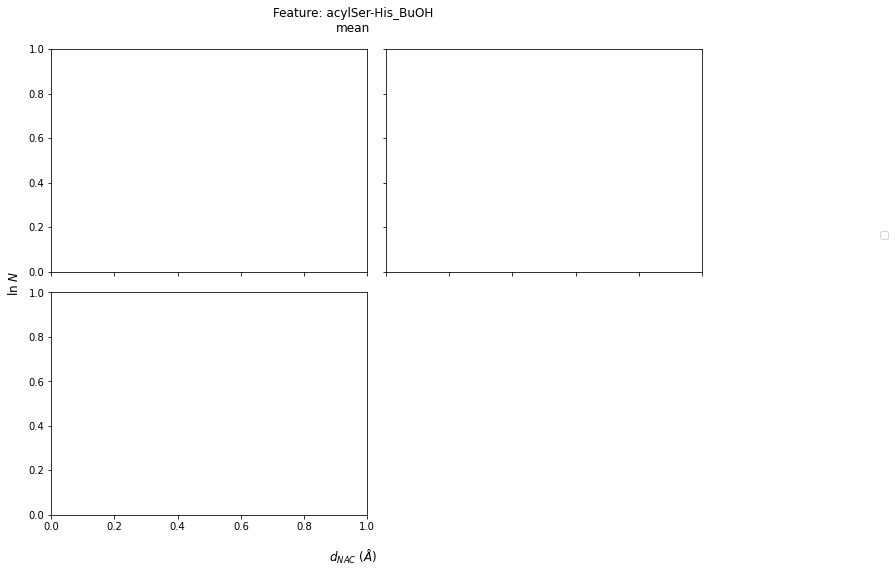

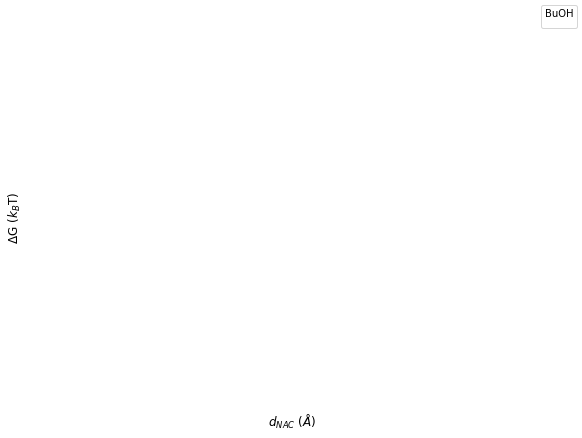

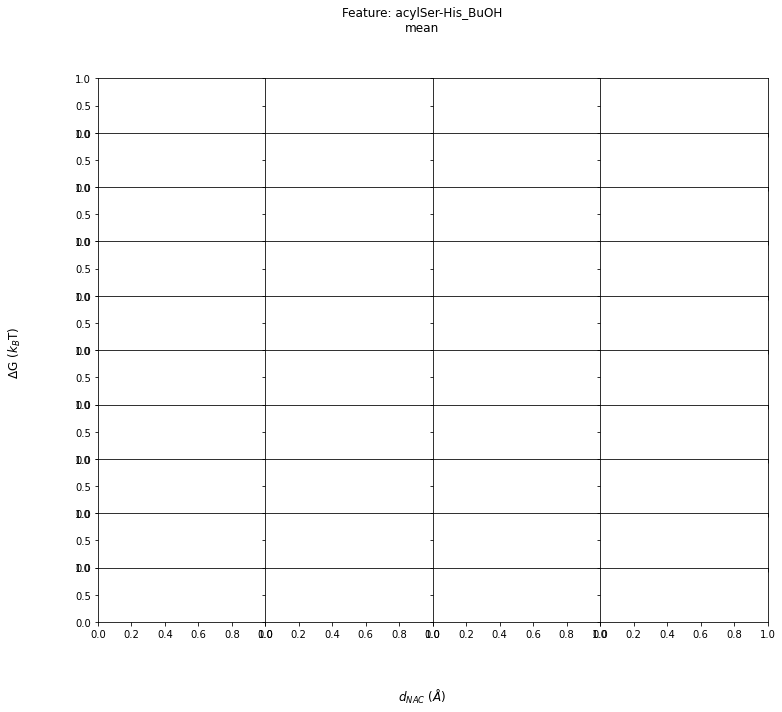

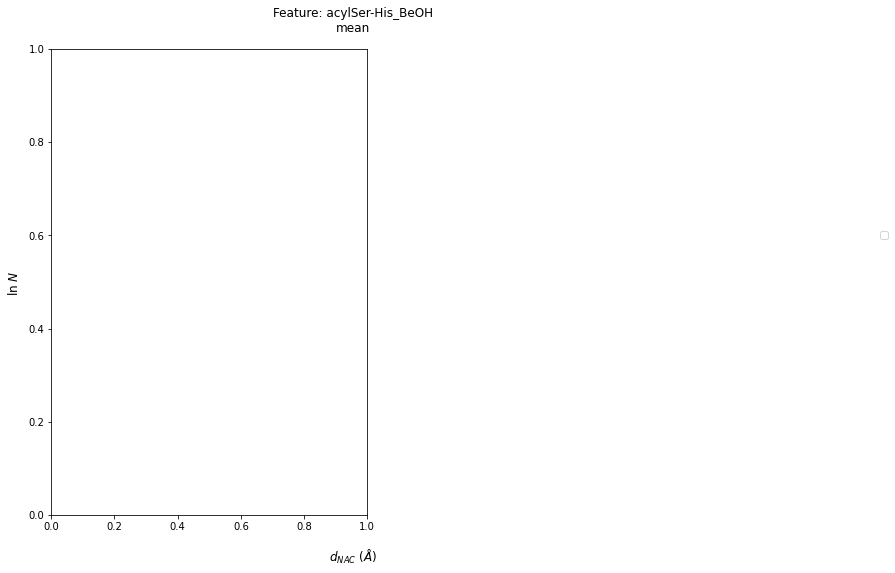

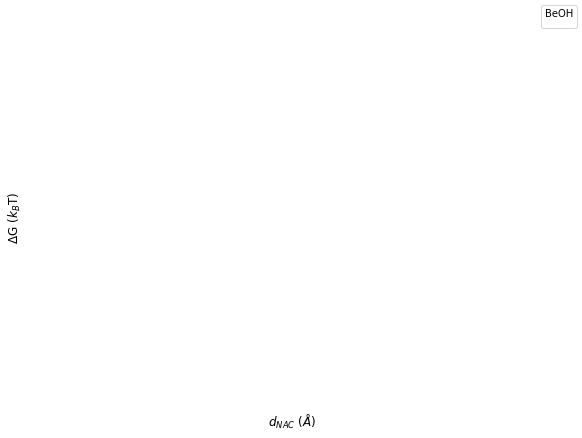

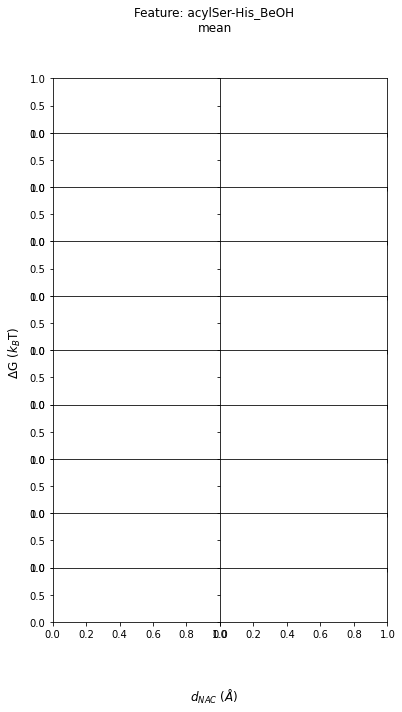

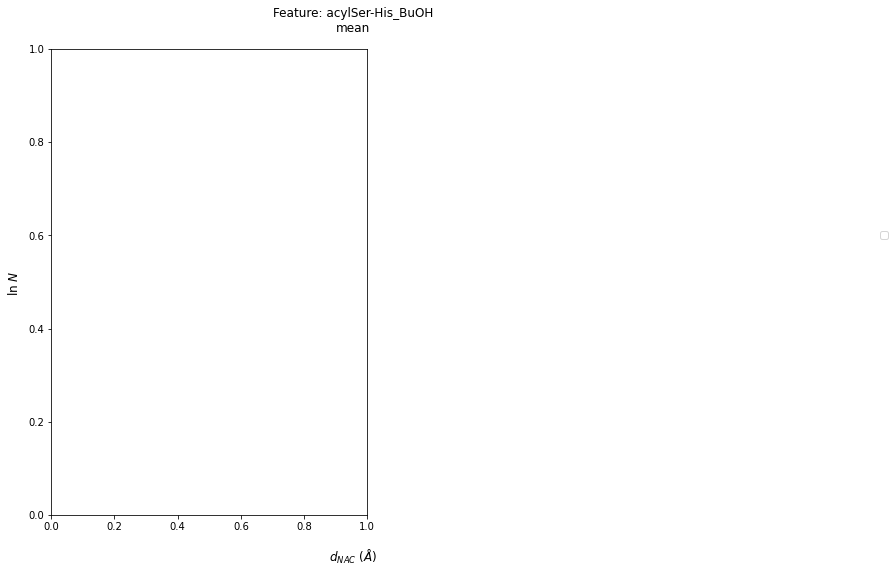

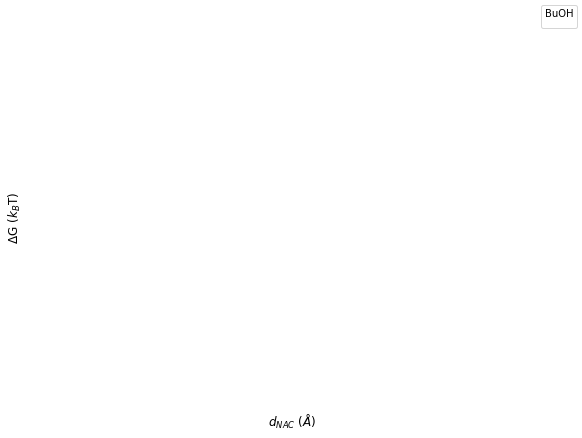

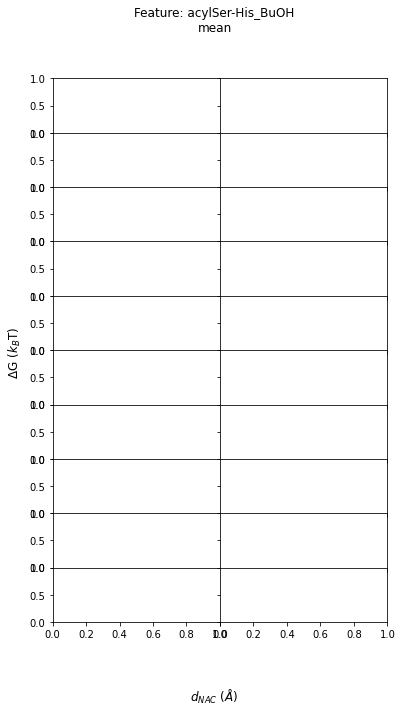

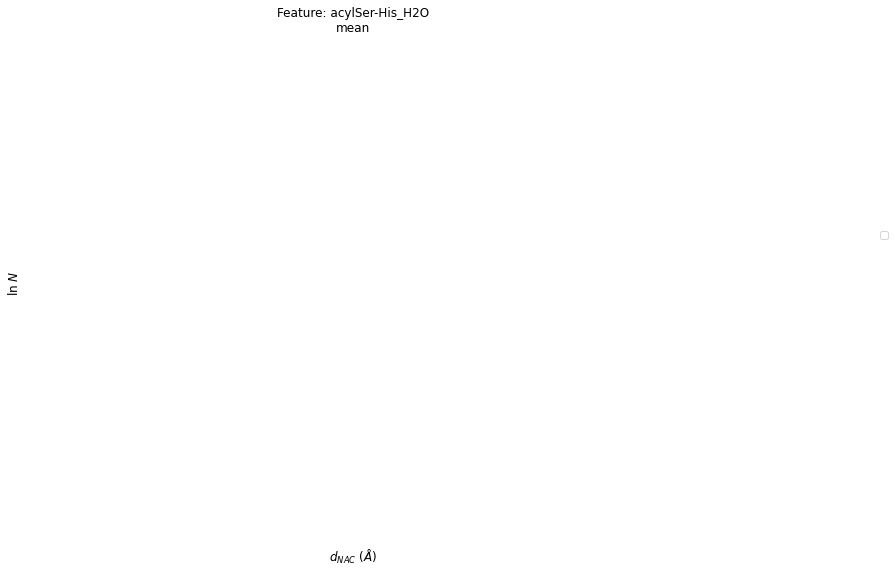

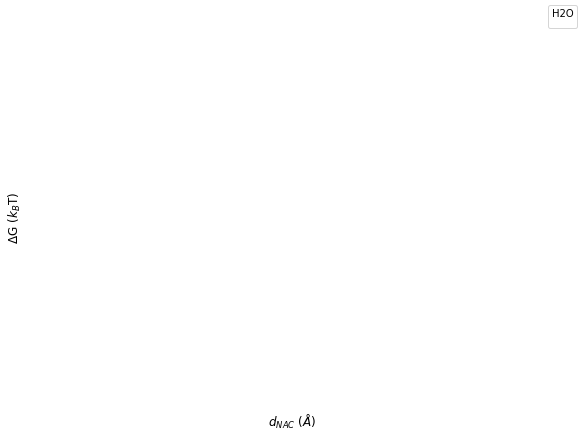

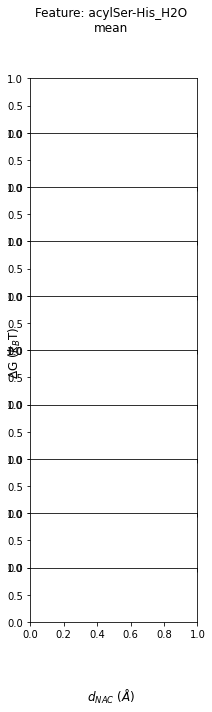

In [14]:
bulks = {'BeOH' : {'10mM' : (70,75),'20mM' : (70,75), '40mM' : (75,80), '100mM' : (80,85),'100mM_BeAc_5mM' : (80,85),'300mM' : (75,80)},
         'BuOH' : {'11mM' : (80,90),'22mM' : (80,90), '100mM' : (95,100),'100mM_ViAc_5mM' : (95,100),'500mM' : (70,75)},
         'ViAc' : { '10mM': (80,90), '50mM' : (60,65), '200mM' : (60,70)},
         'H2O' : {'55.56M' : (55,60)}}

water_mols = {'normal': ['BeOH', 'BuOH'], 
                  'inhibition' : ['BeOH', 'BuOH']}

importlib.reload(Discretize)
dG = collections.defaultdict(dict) 
for project_type, projects in supra_project.items():
    dG[project_type] = {}
    print(project_type)
    if project_type != 'water':
        for mol, project in projects.items():
            if mol == 'ViAc':
                feature_name = f'Ser11-Ala55_{mol}'
            else:
                feature_name = f'acylSer-His_{mol}' 

            df_mol = Discretize.Discretize(project, method='dNAC', feature_name=feature_name).dG_calculation(bulk=bulks[mol], plot_all=True)
            dG[project_type][mol] = df_mol 
            

    else:
        mol = 'H2O' 
        project = projects['H2O']
        print(project, mol)
        df_mol = Discretize.Discretize(project, method='dNAC_combinatorial_onTheFly', feature_name=f'acylSer-His_H2O').dG_calculation(bulk=bulks[mol], bulk_solvent='55.56M', plot_all=True)
        df_mol.columns = pd.MultiIndex.from_product([[mol], df_mol.columns])
        for p_type, mols_w in water_mols.items():
            print(p_type, mols_w)
            if p_type == 'normal':
                for mol_w in mols_w:

                    print(p_type, mol_w)
                    df_mol_w = pd.read_csv(f'{project.results}/binding_profile/binding_profile_acylSer-His_{mol_w}_water_mean_b0_e-1_s1.csv', index_col=0)
                    df_mol_w.columns = pd.MultiIndex.from_product([[mol_w], df_mol_w.columns])
                    df_mol = pd.concat([df_mol, df_mol_w], axis=1)
            else:
                for mol_w in mols_w:
                    if mol_w == 'BeOH':
                        mol2 = 'BeAc'
                    else:
                        mol2 = 'ViAc'
                    print(mol_w, mol2)
                    df_mol_w2 = pd.read_csv(f'{project.results}//binding_profile/binding_profile_acylSer-His_{mol_w}-{mol2}_water_mean_b0_e-1_s1.csv', index_col=0)

                    df_mol_w2.columns = pd.MultiIndex.from_product([[mol_w], df_mol_w2.columns])
                    df_mol = pd.concat([df_mol, df_mol_w2], axis=1)
        dG[project_type][mol] = df_mol 

## Plot

In [15]:
target_regions = {'normal' : {'A': range(5,10), 
                              'T' : [3,4,7,8,9], 
                              'E' : [2,4,6,8,9],
                              'S' : range(1,10), 
                              'B' : [0,1,2,3,4,5,6,7,9]}, #not 8
                  'inhibition' : {'A' : [5,6,7,8],
                                  'T' : [3,4,7,8],
                                  'E' : [2,4,6,8],
                                  'S' : range(1,9),
                                  'B' : range(9)},
                 'water' : {'A': [1],  
                            'T' :[0,1], 
                            'E' : [0,1], 
                            'S' : [0,1], 
                            'B' : [0,1]}}

plot_specs = {'normal' : {'ViAc' : ([4,10,20,80],  pl.cm.YlOrRd(np.linspace(0.2,1,3))), #[0,4,6,9,12,20,80]
                          'BuOH' : ([4,10,20,80], pl.cm.YlGnBu(np.linspace(0.2,1,4)), 'none', '^'), #[0,3.5,5,9,12,20,80]
                          'BeOH' : ([4,10,20,80],pl.cm.BuPu(np.linspace(0.2,1,5)),'full', 's'), 
                          'linestyle' : 'solid'}, # labels=['A', 'T', 'E', 'S', 'B'] [0,4,6,10,12,20,80]
              'inhibition' : {'BuOH' : ([4,10,20,80], ('darkgrey', pl.cm.YlGnBu(np.linspace(0.2,1,4))[2])), 
                             'BeOH' : ([4,10,20,80],('darkgrey', pl.cm.BuPu(np.linspace(0.2,1,5))[3])), 
                              'linestyle' : 'solid'},
              'water' : {'H2O' : ([4,10,20,80], ['black']),
                         'linestyle' : 'solid'}} 

In [129]:
edited_sampled_states

defaultdict(dict,
            {'normal': ({1: 'B',
               3: 'SB',
               7: 'ESB',
               11: 'TSB',
               15: 'TESB',
               19: 'ASB',
               23: 'AESB',
               27: 'ATSB',
               31: 'ATESB'},
              {0: 'B',
               1: 'SB',
               2: 'ESB',
               3: 'TSB',
               4: 'TESB',
               5: 'ASB',
               6: 'AESB',
               7: 'ATSB',
               8: 'ATESB'}),
             'water': ({15: 'TESB', 31: 'ATESB'}, {0: 'TESB', 1: 'ATESB'}),
             'inhibition': ({1: 'B',
               3: 'SB',
               7: 'ESB',
               11: 'TSB',
               15: 'TESB',
               19: 'ASB',
               23: 'AESB',
               27: 'ATSB',
               31: 'ATESB'},
              {0: 'B',
               1: 'SB',
               2: 'ESB',
               3: 'TSB',
               4: 'TESB',
               5: 'ASB',
               6: 'AESB',
           

In [404]:
import plots as Plots
importlib.reload(Plots)

figures = Plots.Plots(supra_project, 
                      dG, 
                      combinatorial, 
                      plot_specs, 
                      sampled_states, 
                      target_regions,
                      mol_water ={'BeOH' : (supra_project['normal']['BeOH'].parameter, 'BeAc'),
                                  'BuOH' : (supra_project['normal']['BuOH'].parameter, 'ViAc')},
                      metrics= True,
                     metric_data=metric_tables_all,
                     correlation_data=correlation_tables_all,
                     double_comb_states = edited_sampled_states,
                     double_comb_fractions=double_comb_states_fractions_edited).plot_thermodynamics()

NameError: name 'plot_specs' is not defined

In [ ]:
from sklearn.feature_selection import f_regression, mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
mutual_information = collections.defaultdict(dict)
for mol, mol2 in mol_ternary.items():
    mol_df = supra_project['normal'][mol]
   # + [f'100mM_{mol2}_5mM']

    for it in its:
        df = correlation_trajectories_all['water'][mol][it]
        print(it)
        X = df.loc[:, mol]
        y = df.loc[:, 'water']
        
        # Apply one-hot encoder to each column with categorical data
        OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
        OH_X = pd.DataFrame(OH_encoder.fit_transform(X.values.reshape(-1,1)))
        OH_y = pd.DataFrame(OH_encoder.transform(y.values.reshape(-1,1)))

        
        #mi = mutual_info_classif(X.values.reshape(-1,1), y, discrete_features=False)
        mi_disc = mutual_info_classif(X.values.reshape(-1,1), y, discrete_features=True)
        #OH_mi_disc = mutual_info_classif(OH_X, OH_y, discrete_features=True)
        print(it, mi, mi_disc)
        

        mutual_information[mol][it] = (mi_disc, OH_mi_disc)

## Density Maps

NOTE: Compute intensive, using previously stored files.

In [ ]:
full_densities=trajectories.DensityMap_fullTraj(level=2, filtered=True, stride=5)

In [ ]:
full_densities

In [ ]:
#of extracted frames
densities, stats=trajectories.DensityMap_frames(frames=extracted_frames, level=2, dists=[('resid 290 and name NZ', 'resid 145 and name OD1')])

In [ ]:
import numpy as np
dG_quantile = discretized.dG_calculation(level=2, describe='quantile', quantiles=[0.5, 0.9, 0.92, 0.94, 0.96, 0.98, 0.99, 1.0], feature_name=f'acylSer-His_{project.ligand[0]}', bulk=(85,95), n_cores=14)

In [ ]:
for k, v in featurize.features.items():
    print(k)
    featurize.plot(input_df=v, level=2, feature_name=k, subplots_=False)

In [ ]:
featurized['RMSF']=featurize.calculate('protein and name CA', 
                                       method='RMSF',
                                       n_cores=2,
                                       feature_name=f'RMSF_Ca',
                                        def_top=['acyl_octamer_noW.pdb'],
                                        def_traj=['acyl_octamer_noW.xtc'])

In [ ]:
#ref_structures=['SETD2', 'SETD2_complexed_noSub']

featurize.calculate('backbone', 
                    method='RMSD',
                    n_cores=4,
                    feature_name=f'RMSD_bb',                             
                    def_top=['acyl_octamer_noW.pdb'],
                    def_traj=['acyl_octamer_noW.xtc'])

In [ ]:
states_colors = {'B' : [0,0,0,0,1], 
                 'SB' : [0,0,0,1,1],
                 'ESB' : [0,0,1,1,1],
                 'TSB' : [0,1,0,1,1],
                 'TESB' : [0,1,1,1,1],
                 'ASB' : [1,0,0,1,1],
                 'AESB' : [1,0,1,1,1],
                 'ATSB' : [1,1,0,1,1],
                 'ATES' : [1,1,1,1,0],
                 'ATESB' : [1,1,1,1,1]}

In [ ]:
import plots as Plots
importlib.reload(Plots)
figures = Plots.plot_scheme(states_colors)

In [ ]:
df_beoh = pd.read_csv(f'{project.results}/binding_profile_acylSer-His_BeOH_mean_b0_e-1_s1.csv', index_col=0)
df_buoh = pd.read_csv(f'{project.results}/binding_profile_acylSer-His_BuOH_mean_b0_e-1_s1.csv', index_col=0)
df_viac = pd.read_csv(f'{project.results}/binding_profile_Ser11-Ala55_ViAc_mean_b0_e-1_s1.csv', index_col=0)
scalars = {'BeOH': [10, 20, 40, 100, 300], 
           'BuOH' : [11, 22, 100, 500],
          'ViAc' : [10, 50, 200]}
iterables = { 'BeOH' : [['10mM', '20mM', '40mM', '100mM', '300mM'], df_beoh, df_beoh_water],
            'BuOH' : [['11mM', '22mM', '100mM', '500mM'], df_buoh, df_buoh_water],
            'ViAc' : [['10mM', '50mM', '200mM'], df_viac, df_water]} #, ('s')]}
range_integral = dG.index.values[::2]
range_integral = range_integral[np.logical_and(range_integral > 3.125, range_integral < 12.125)]
colors  = pl.cm.Greens(np.linspace(0.1,1,len(range_integral))) 
colors_water = pl.cm.Reds(np.linspace(0.1,1,len(range_integral))) 
colors_diff = pl.cm.Blues(np.linspace(0.1,1,len(range_integral))) 
r_min, r_max = range_integral[0], range_integral[-1]
fig, axes = plt.subplots(3,3, figsize=(10,6))
integrals = {}
for idx_it, (name, specs) in enumerate(iterables.items()):
    print(name)
    its = specs[0]
    df_profile = specs[1]
    df_profile_water = specs[2]
    integrals_it = np.empty([len(its), 2])
    for idx_r, r in enumerate(range_integral[1:]):
        for idx, it in enumerate(its):
            integrals_it[idx, 0] = df_profile.loc[r_min:r][f'$\Delta$G {it}'].sum()
            if name != 'ViAc':
                integrals_it[idx, 1] = df_profile_water.loc[r_min:r][f'$\Delta$G {it}'].sum()
            else:
                integrals_it[idx, 1] = df_profile_water.loc[r_min:r][f'$\Delta$G 55.56M'].sum()
        integrals_diff = integrals_it[:, 0] - integrals_it[:, 1]
        integrals[name] = integrals_it
        #for i in integrals_it.T:
        axes[0, idx_it].plot(scalars[name], integrals_it.T[0], '-', marker='.', color=colors[idx_r])
        axes[1, idx_it].plot(scalars[name], integrals_it.T[1], '-', marker='.', color=colors_water[idx_r])
        axes[2, idx_it].plot(scalars[name], integrals_diff.T, '-', marker='.', color=colors_diff[idx_r]) 
plt.show()

## **Trajectory operations**

Initiate the trajectory object, which will be used to make further actions.

In [ ]:
importlib.reload(Trajectory)
importlib.reload(tools)
trajectories=main.Trajectory.Trajectory(project, def_top=[f'{protein[0]}_noW.pdb'], def_traj=[f'{protein[0]}_noW.xtc'])

In [ ]:
import mdtraj as md
import re

selections = ['name CA', f'name O07', 'water', 'name NA']
specs_systems = []
now = []
for name,system in project.systems.items():
    for top in system.topology:
        if re.search(f'{project.protein[0]}.gro', top) or re.search(f'{project.protein[0]}-eq.gro', top):
            print(top)
            traj = md.load(top)
            specs = (traj.n_atoms, traj.n_residues, traj.unitcell_lengths[0][0])
            specs2 = [len(traj.topology.select(sel)) for sel in selections]
            specs = specs + tuple(specs2)
            print(specs)
            specs_systems.append(specs)
            break
        
print(specs_systems)

In [ ]:
from scipy import stats 
import numpy as np
features = np.array(specs_systems).reshape(len(project.parameter), project.replicas, 7) 
fts = ['n. atoms', 'n. res', 'size', 'n. prot', 'n. lig', 'n. water', 'n. NA']
print('modes')
for idx, i in enumerate(features):
    print(idx)
    modes = stats.mode(i)
    for mode in modes[::2]:
        for i, y in zip(mode.flat, fts):
            print(y, i)
print('min/max')
for i in features:

    for x, y in zip(range(7), fts):
        ft = i[:,x]
        print(y, ft.min(), ft.max())

### **Extract state frames**

Define the frames belonging to a set of states across all *trajectories*. A dataframe of discretized trajectories must be given. 

In [ ]:

trajectories.extractFrames_by_state(combinatorial, 
                                    states=[127],
                                    state_labels=states,
                                    feature_name=f'acylSer-His_{project.ligand[0]}',
                                   n_samples=1000)

In [ ]:
trajectories.densityMaps_by_state(combinatorial, 
                                  states=[127],
                                  selection='name O07',
                                  state_labels=states,
                                  feature_name=f'acylSer-His_{project.ligand[0]}',
                                 n_samples=1000,
                                 extract_mode = 'by_reference')

In [ ]:
trajectories.clusters_by_state(combinatorial,
                               states=[127],
                               selection = 'backbone',
                               n_clusters=2,
                               state_labels=states,
                               feature_name=f'acylSer-His_{project.ligand[0]}',
                               n_samples=1000)